In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [8]:
p=df[['LoanAmount','Loan_Amount_Term']]
for col in p.columns:
    df[col]=df[col].fillna(df[col].mean())
df['Credit_History']=df['Credit_History'].ffill()
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

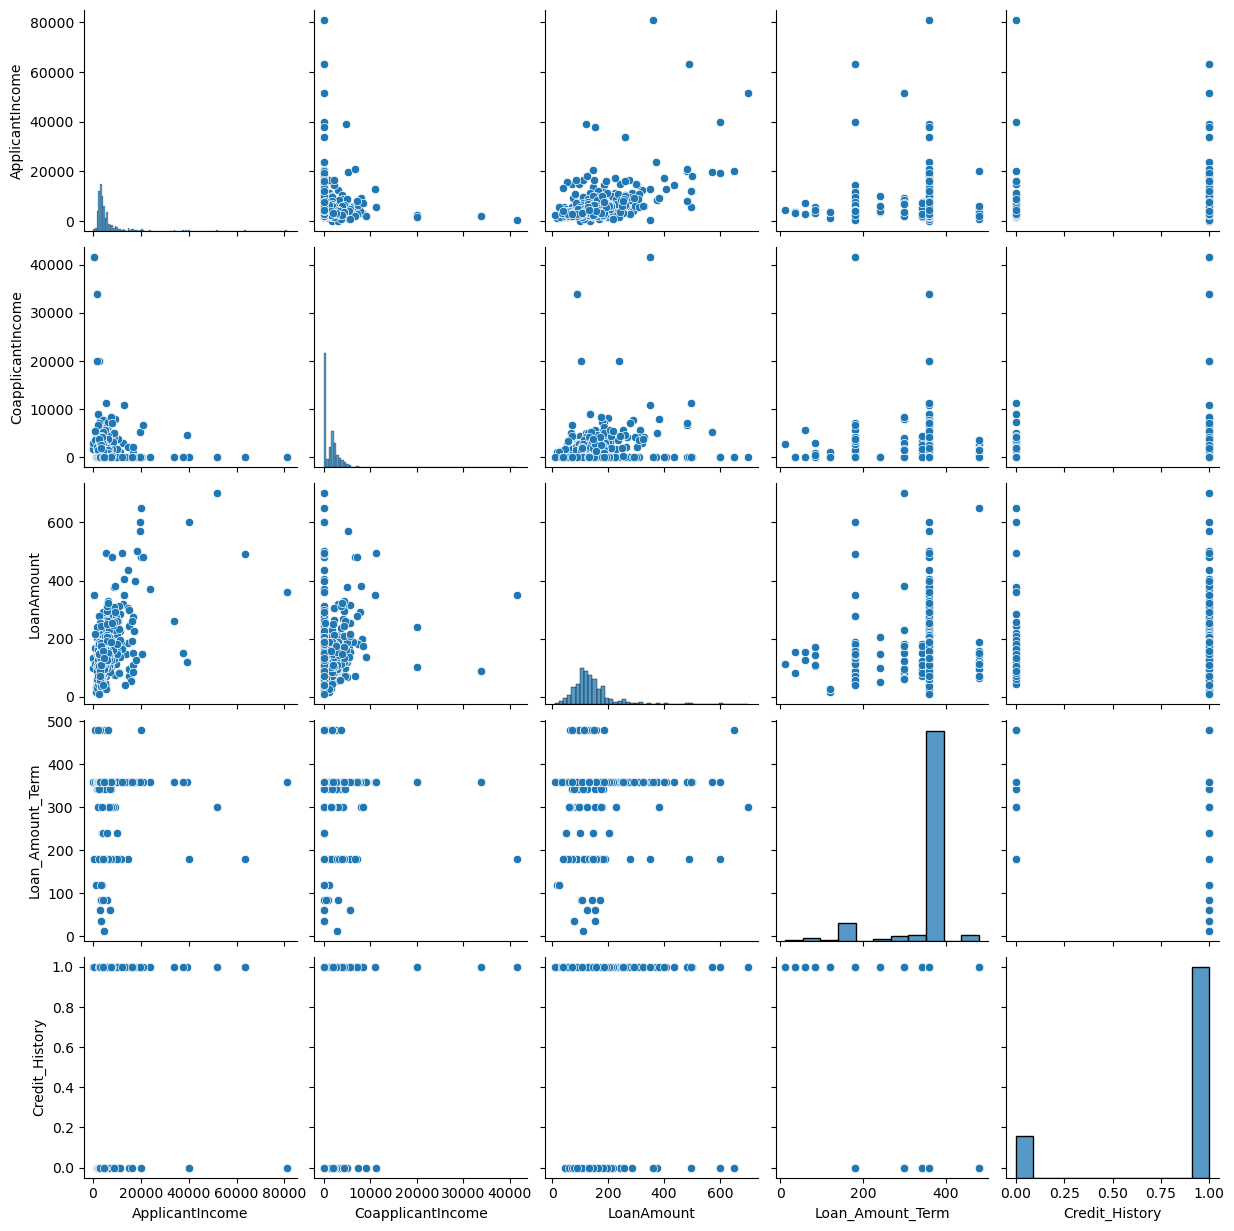

In [9]:
sns.pairplot(df)

<Axes: >

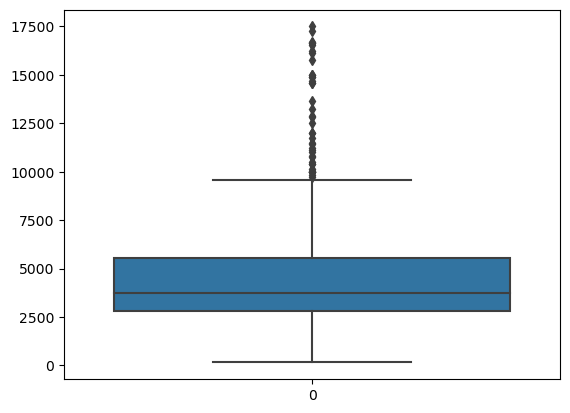

In [10]:
means = df[['ApplicantIncome', 'CoapplicantIncome']].mean()
stds = df[['ApplicantIncome', 'CoapplicantIncome']].std()

# Define the threshold in terms of the number of standard deviations (e.g., k=2)
k = 2

# Define the range for non-outlier values for each column
lower_ranges = means - k * stds
upper_ranges = means + k * stds

# Update the values outside the range for each column in the original DataFrame (df1)
for col in ['ApplicantIncome', 'CoapplicantIncome']:
    df.loc[(df[col] < lower_ranges[col]) | (df[col] > upper_ranges[col]), col] = None

# Box plot after removing outliers
sns.boxplot(df['ApplicantIncome'])

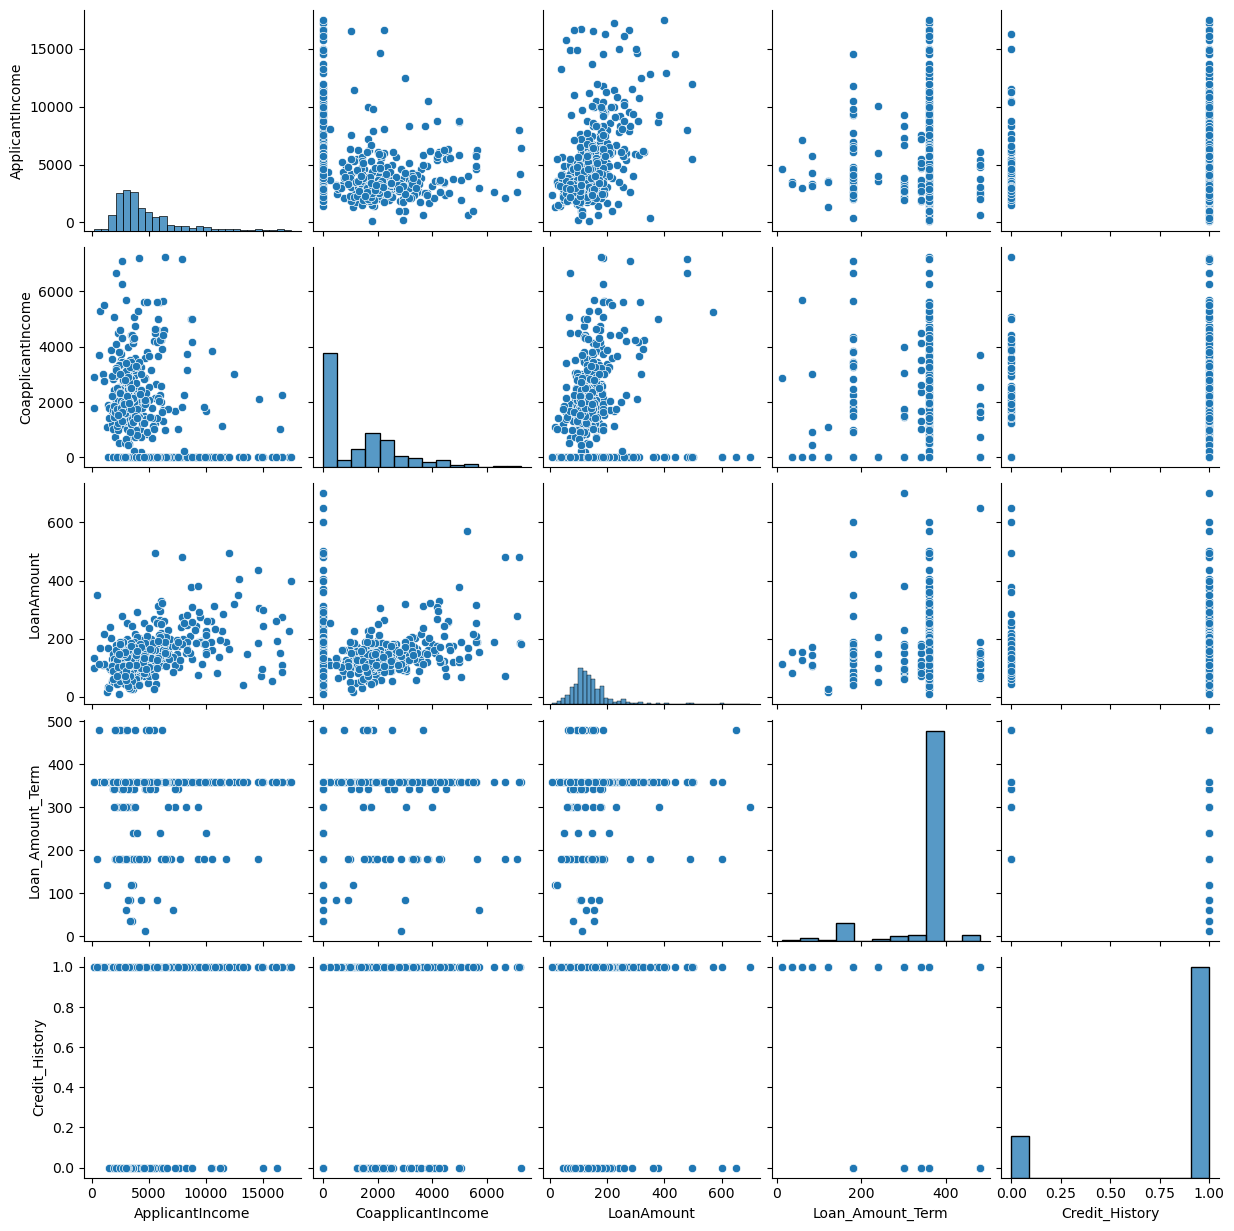

In [9]:
sns.pairplot(df)

In [11]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome      16
CoapplicantIncome    11
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.dropna(subset=['ApplicantIncome'],inplace=True)
df.dropna(subset=['CoapplicantIncome'],inplace=True)
df.isna().sum()

Loan_ID               0
Gender               11
Married               3
Dependents           15
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

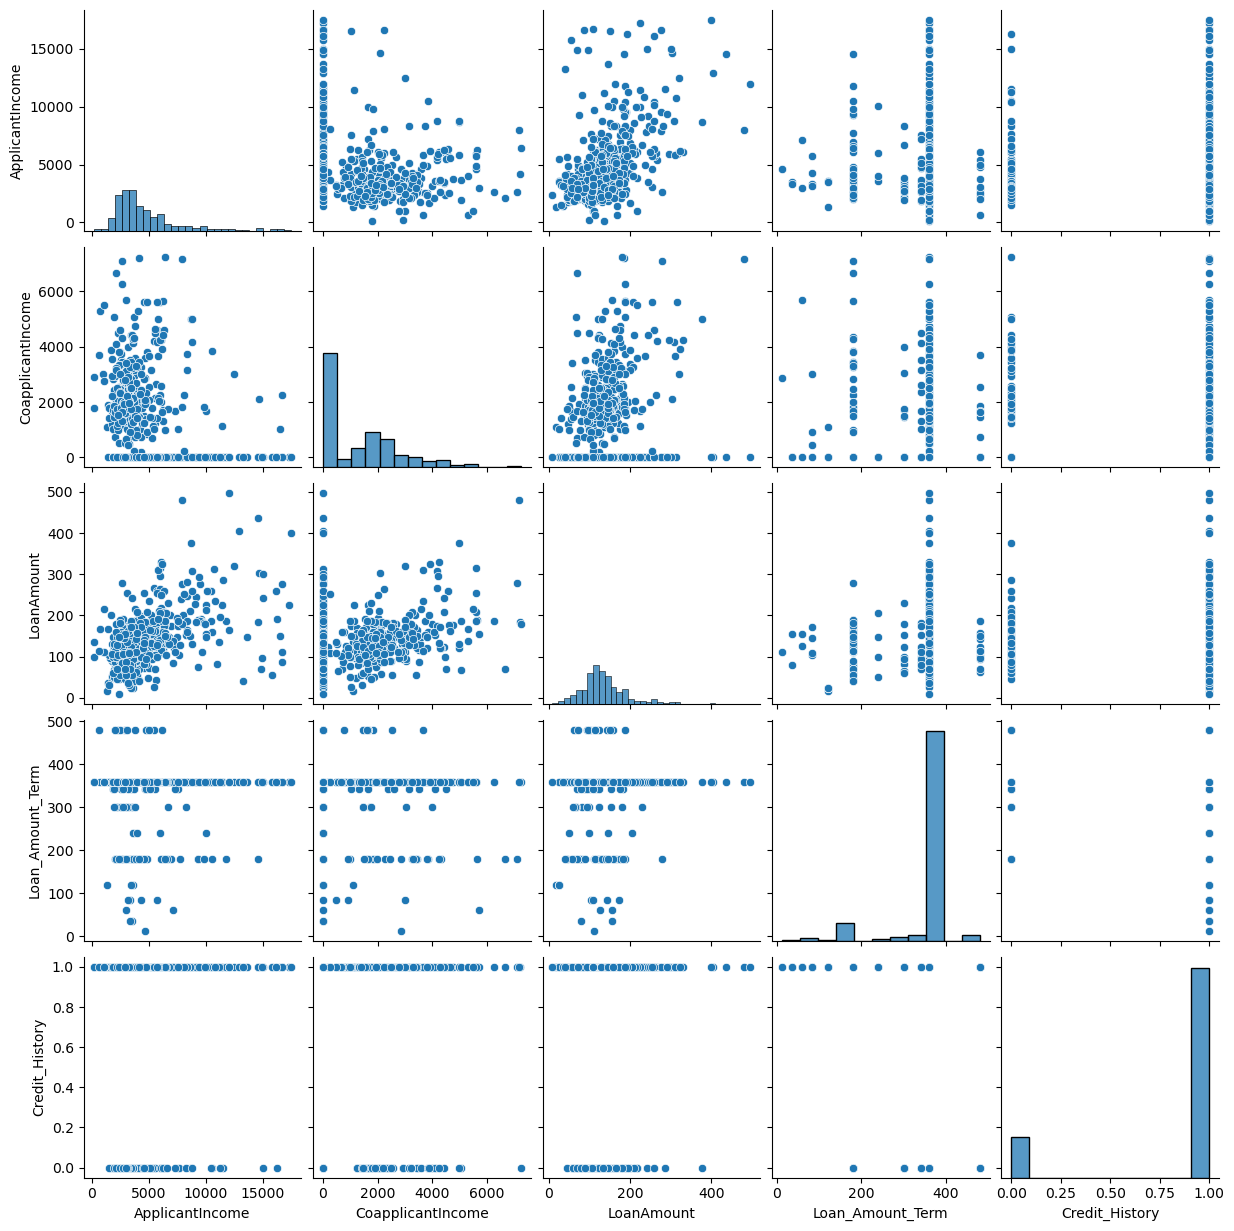

In [13]:
sns.pairplot(df)

In [14]:
df['TotalAmount']=df['ApplicantIncome']+df['CoapplicantIncome']
df.isna().sum()

Loan_ID               0
Gender               11
Married               3
Dependents           15
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
TotalAmount           0
dtype: int64

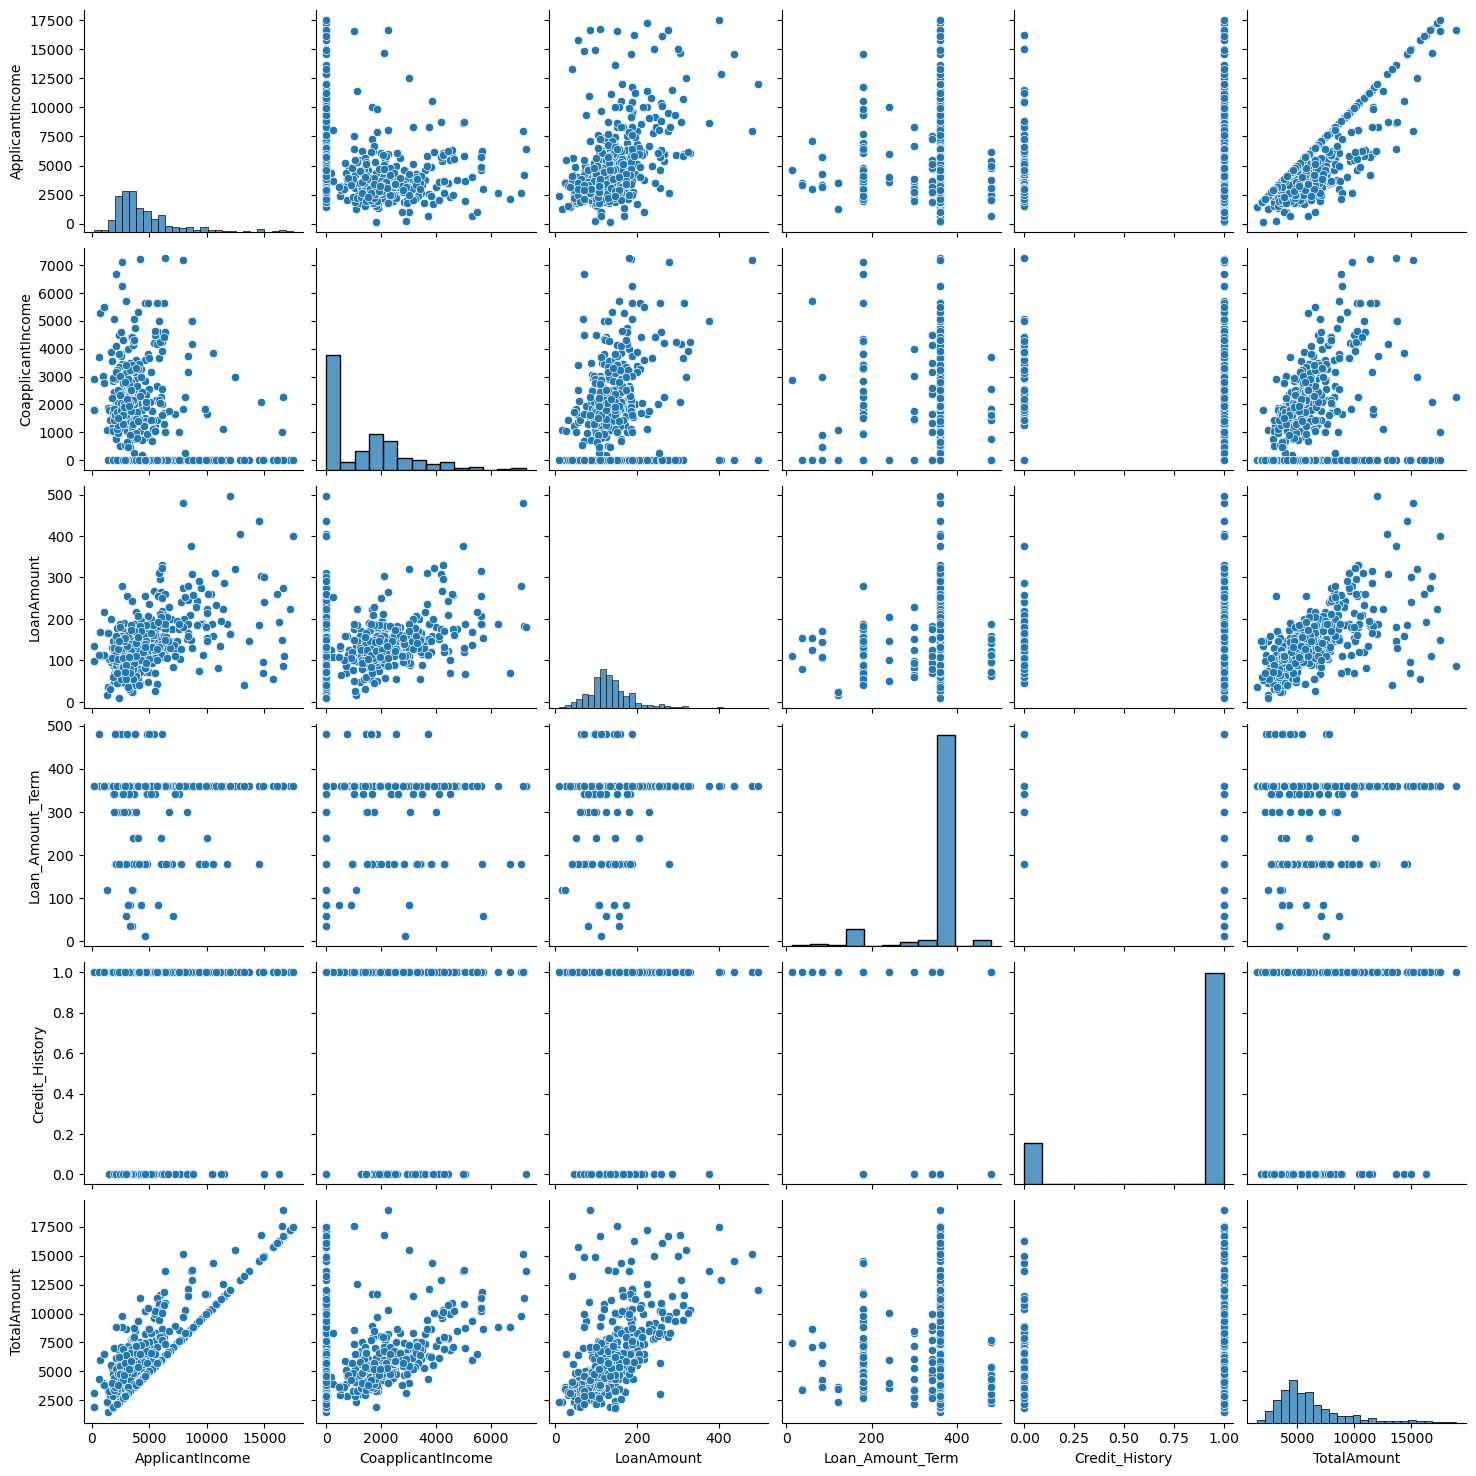

In [16]:
sns.pairplot(df)

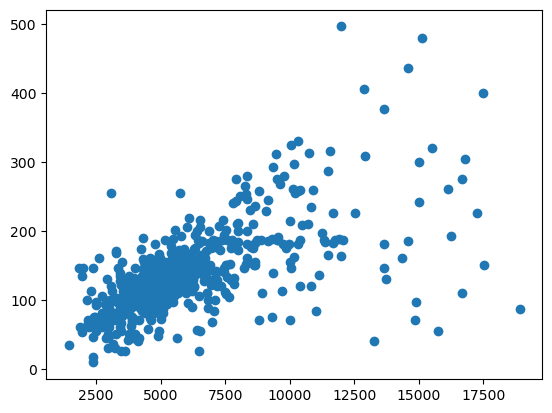

In [17]:
plt.scatter(df['TotalAmount'],df['LoanAmount'])
plt.show()

<Axes: >

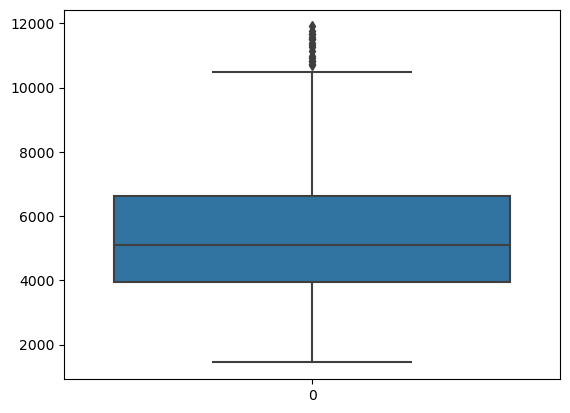

In [18]:
means1 = df[['TotalAmount', 'LoanAmount']].mean()
stds1 = df[['TotalAmount', 'LoanAmount']].std()

# Define the threshold in terms of the number of standard deviations (e.g., k=2)
k1 = 2

# Define the range for non-outlier values for each column
lower_ranges1 = means1 - k1 * stds1
upper_ranges1 = means1 + k1 * stds1

# Update the values outside the range for each column in the original DataFrame (df1)
for col in ['TotalAmount', 'LoanAmount']:
    df.loc[(df[col] < lower_ranges1[col]) | (df[col] > upper_ranges1[col]), col] = None

# Box plot after removing outliers
sns.boxplot(df['TotalAmount'])

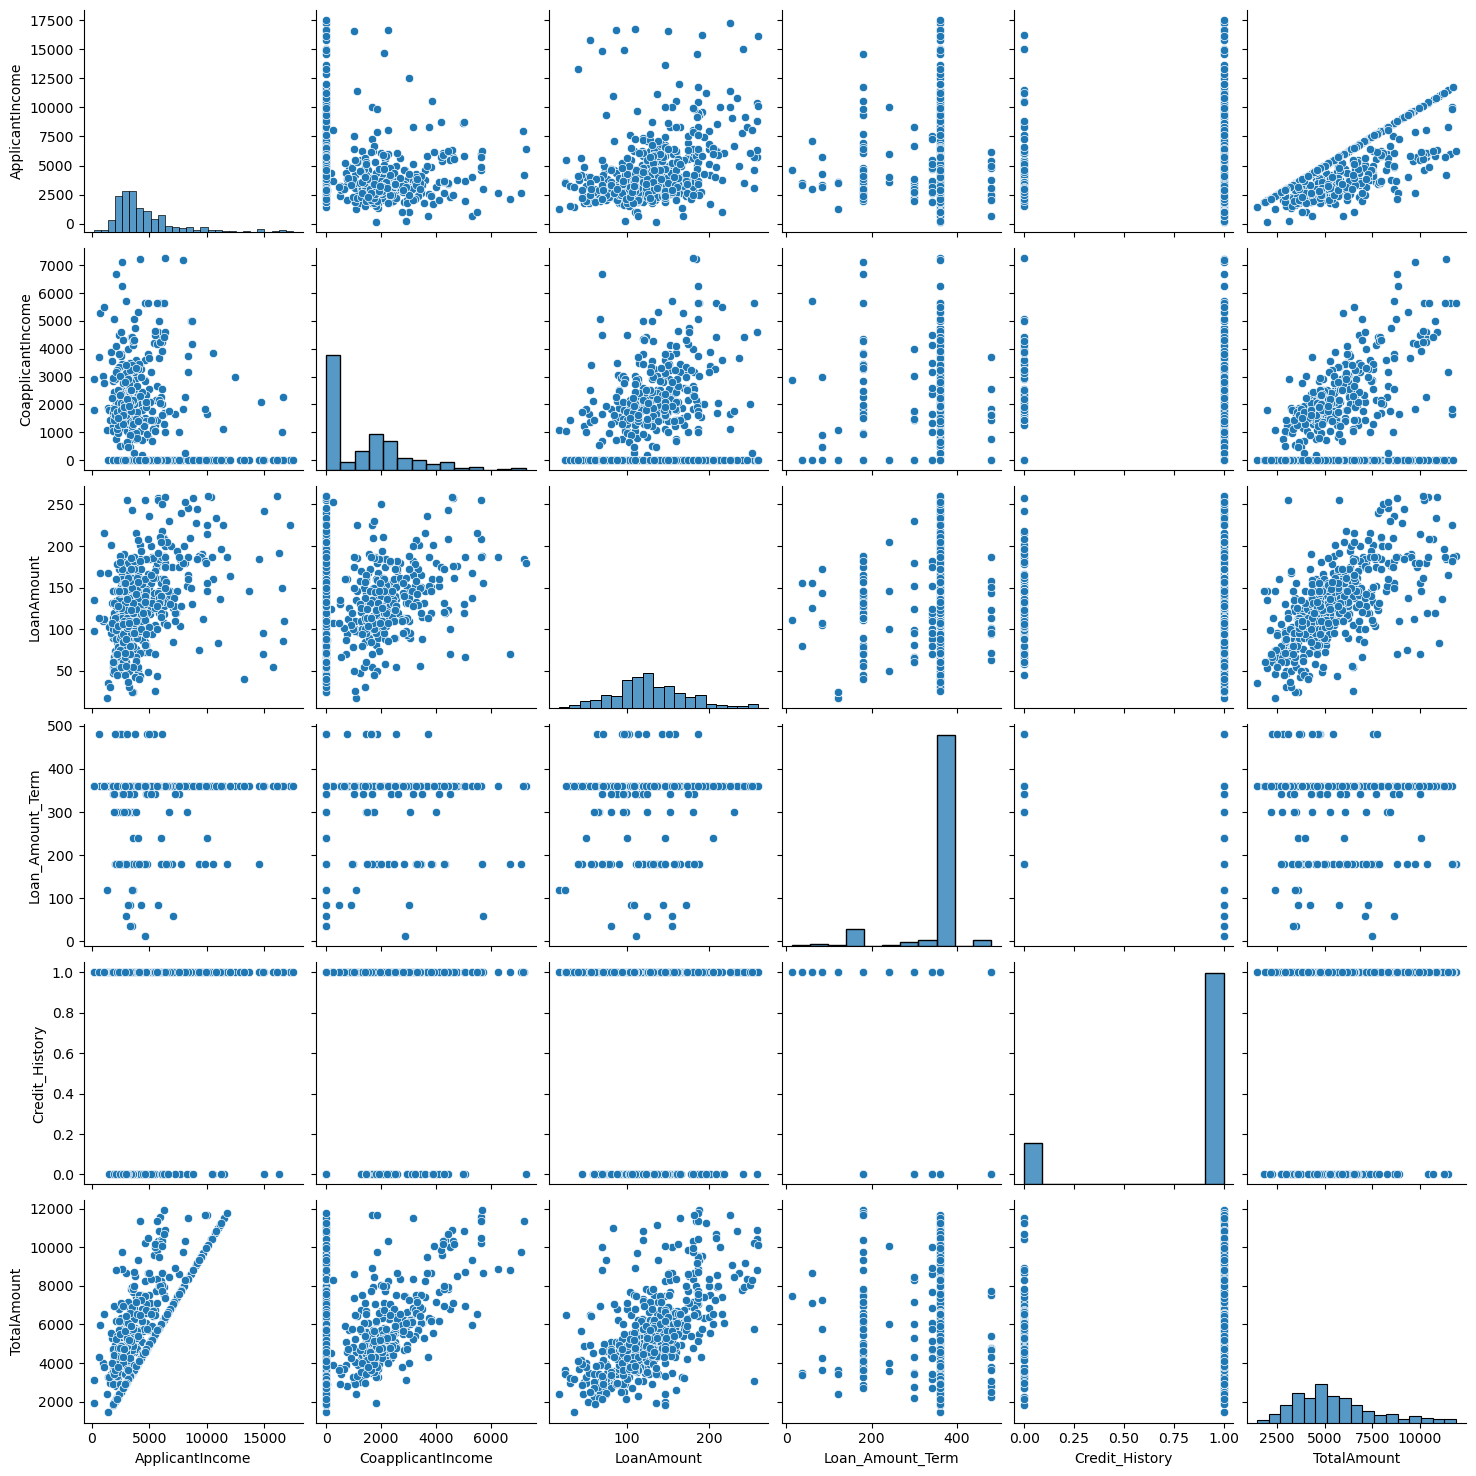

In [19]:
sns.pairplot(df)

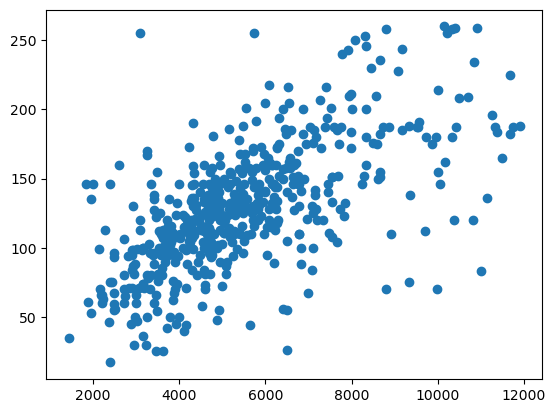

In [20]:
plt.scatter(df['TotalAmount'],df['LoanAmount'])
plt.show()

In [21]:
df.isna().sum()

Loan_ID               0
Gender               11
Married               3
Dependents           15
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           26
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
TotalAmount          30
dtype: int64

In [22]:
df.dropna(subset=['LoanAmount'],inplace=True)
df.dropna(subset=['TotalAmount'],inplace=True)
df.isna().sum()

Loan_ID               0
Gender                9
Married               3
Dependents           14
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
TotalAmount           0
dtype: int64

/var/folders/sn/55j9sg7x7fg2w9hy06rx1sh40000gn/T/ipykernel_2579/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

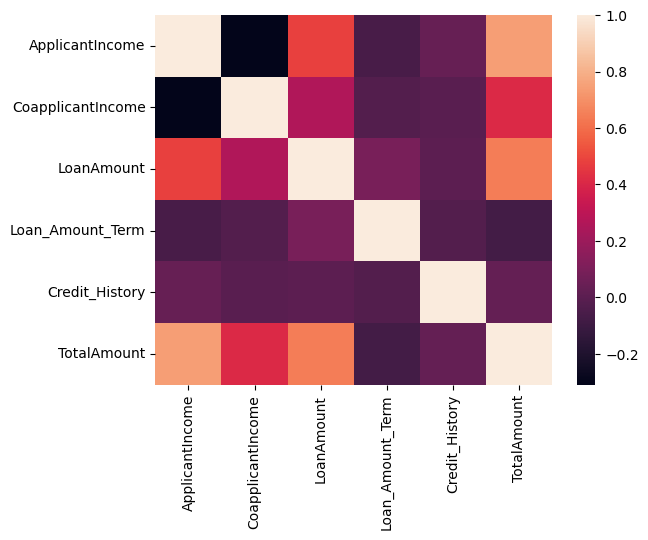

In [23]:
sns.heatmap(df.corr())

# Testing Data

In [24]:
df1=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [25]:
df1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [26]:
q=df1[['LoanAmount','Loan_Amount_Term']]
for col in q.columns:
    df1[col]=df1[col].fillna(df1[col].mean())
df1['Credit_History']=df1['Credit_History'].ffill()
df1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

<Axes: >

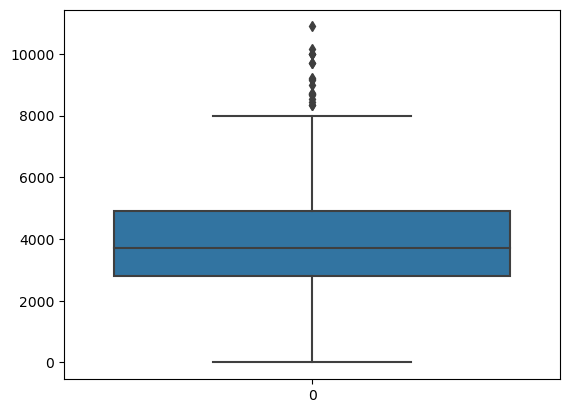

In [27]:
means2 = df1[['ApplicantIncome', 'CoapplicantIncome']].mean()
stds2 = df1[['ApplicantIncome', 'CoapplicantIncome']].std()

# Define the threshold in terms of the number of standard deviations (e.g., k=2)
k2= 1.5

# Define the range for non-outlier values for each column
lower_ranges2 = means2 - k2 * stds2
upper_ranges2 = means2 + k2 * stds2

# Update the values outside the range for each column in the original DataFrame (df1)
for col in ['ApplicantIncome', 'CoapplicantIncome']:
    df1.loc[(df1[col] < lower_ranges2[col]) | (df1[col] > upper_ranges2[col]), col] = None

# Box plot after removing outliers
sns.boxplot(df1['ApplicantIncome'])

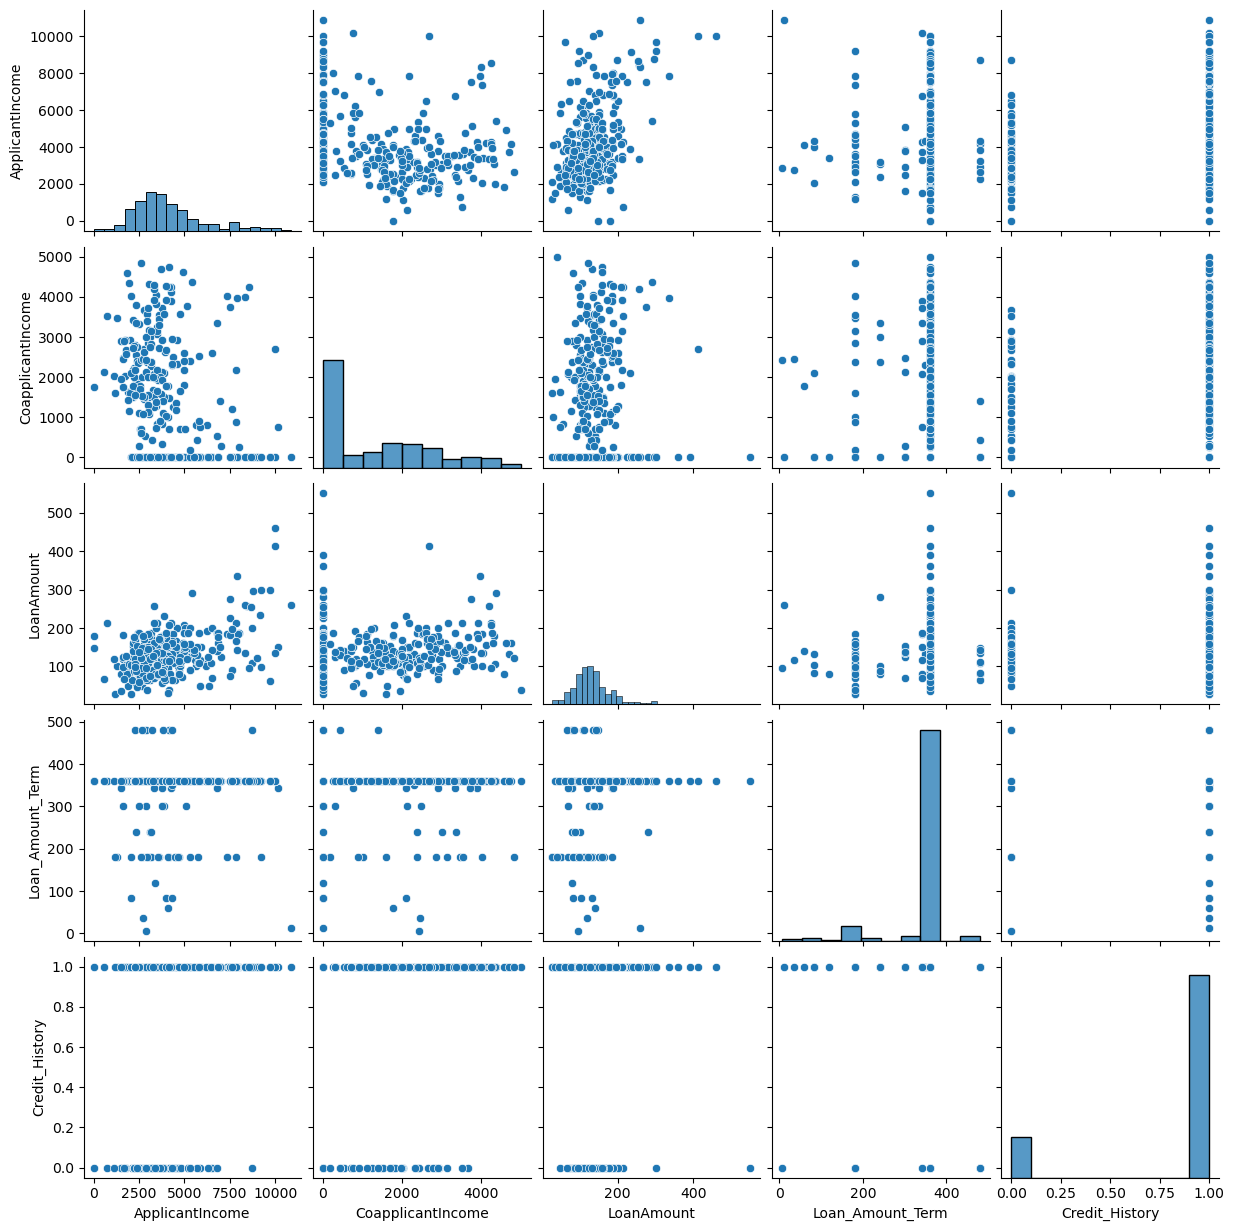

In [28]:
sns.pairplot(df1)

In [29]:
df1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome      15
CoapplicantIncome    11
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [30]:
df1.dropna(subset=['ApplicantIncome'],inplace=True)
df1.dropna(subset=['CoapplicantIncome'],inplace=True)
df1.isna().sum()

Loan_ID               0
Gender               10
Married               0
Dependents            9
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [31]:
df1['TotalAmount']=df1['ApplicantIncome']+df1['CoapplicantIncome']
df1.isna().sum()

Loan_ID               0
Gender               10
Married               0
Dependents            9
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
TotalAmount           0
dtype: int64

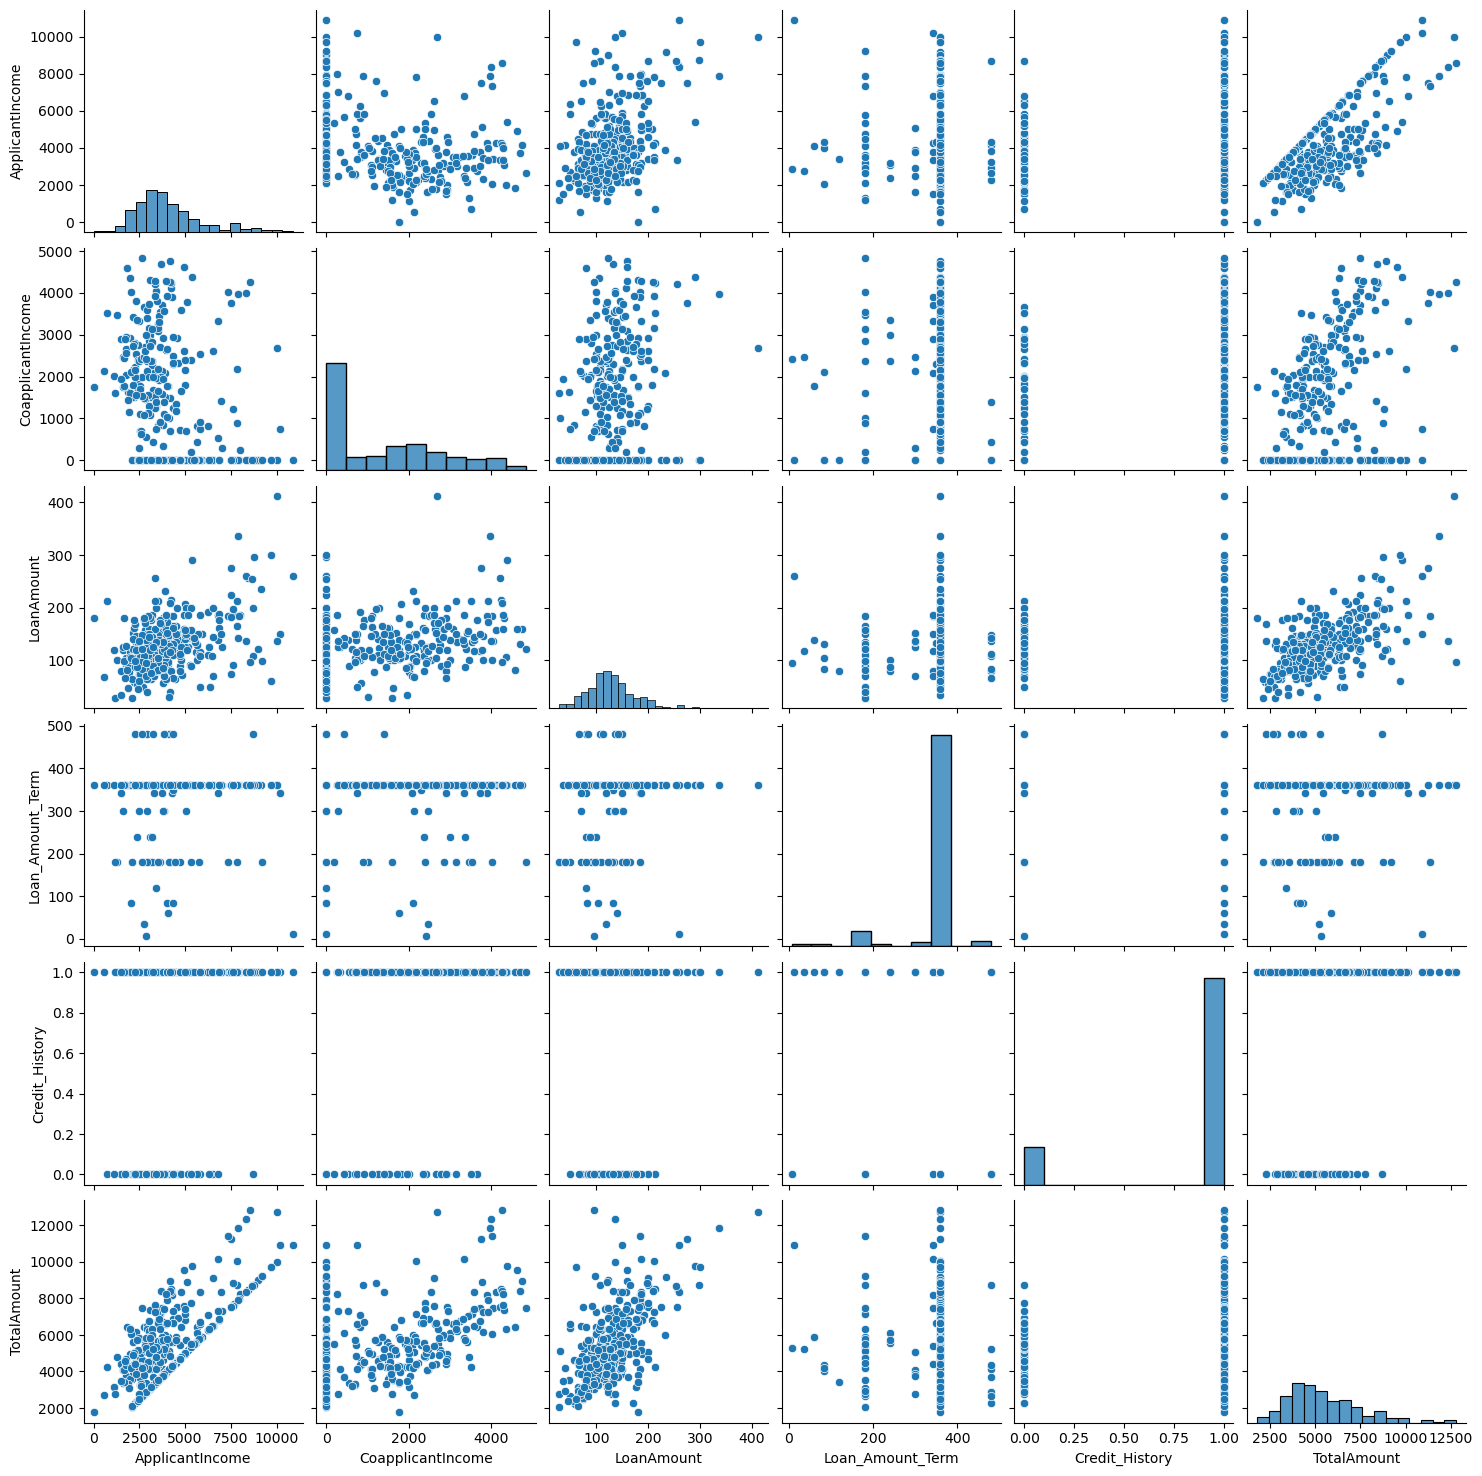

In [32]:
sns.pairplot(df1)

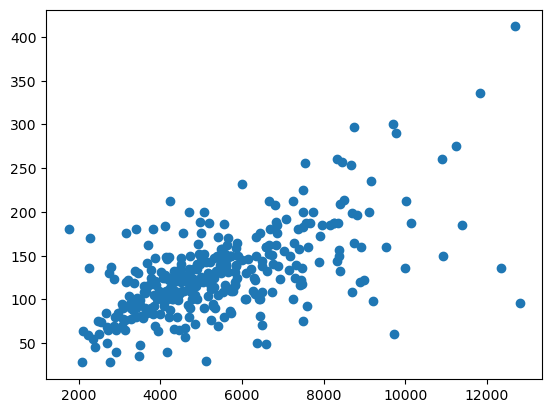

In [33]:
plt.scatter(df1['TotalAmount'],df1['LoanAmount'])
plt.show()

<Axes: >

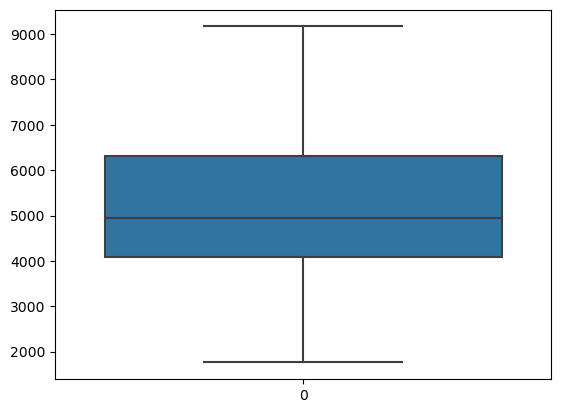

In [34]:
means3 = df[['TotalAmount', 'LoanAmount']].mean()
stds3 = df[['TotalAmount', 'LoanAmount']].std()

# Define the threshold in terms of the number of standard deviations (e.g., k=2)
k3 = 1.79671

# Define the range for non-outlier values for each column
lower_ranges3 = means3 - k3 * stds3
upper_ranges3 = means3 + k3 * stds3

# Update the values outside the range for each column in the original DataFrame (df1)
for col in ['TotalAmount', 'LoanAmount']:
    df1.loc[(df1[col] < lower_ranges3[col]) | (df1[col] > upper_ranges3[col]), col] = None

# Box plot after removing outliers
sns.boxplot(df1['TotalAmount'])

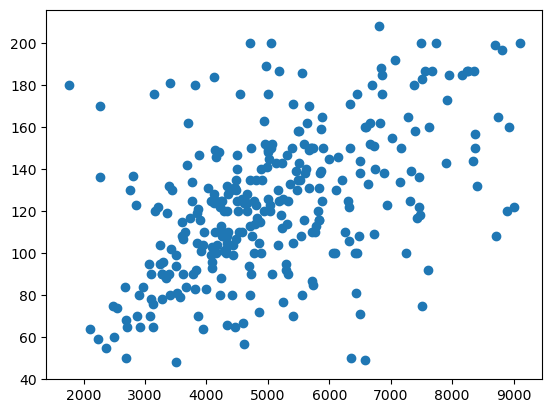

In [35]:
plt.scatter(df1['TotalAmount'],df1['LoanAmount'])
plt.show()

/var/folders/sn/55j9sg7x7fg2w9hy06rx1sh40000gn/T/ipykernel_2579/781785195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr())


<Axes: >

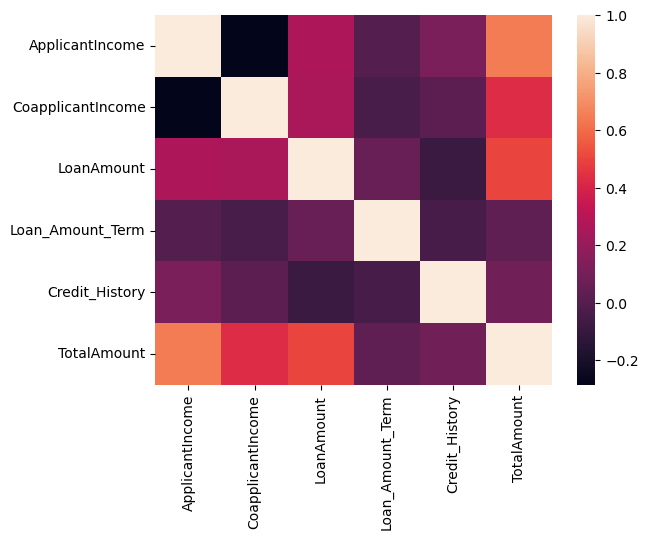

In [36]:
sns.heatmap(df1.corr())

In [37]:
df1.isna().sum()

Loan_ID               0
Gender               10
Married               0
Dependents            9
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
TotalAmount          16
dtype: int64

In [38]:
df1.dropna(subset=['TotalAmount'],inplace=True)
df1.dropna(subset=['LoanAmount'],inplace=True)
df1.isna().sum()

Loan_ID               0
Gender               10
Married               0
Dependents            8
Education             0
Self_Employed        17
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
TotalAmount           0
dtype: int64

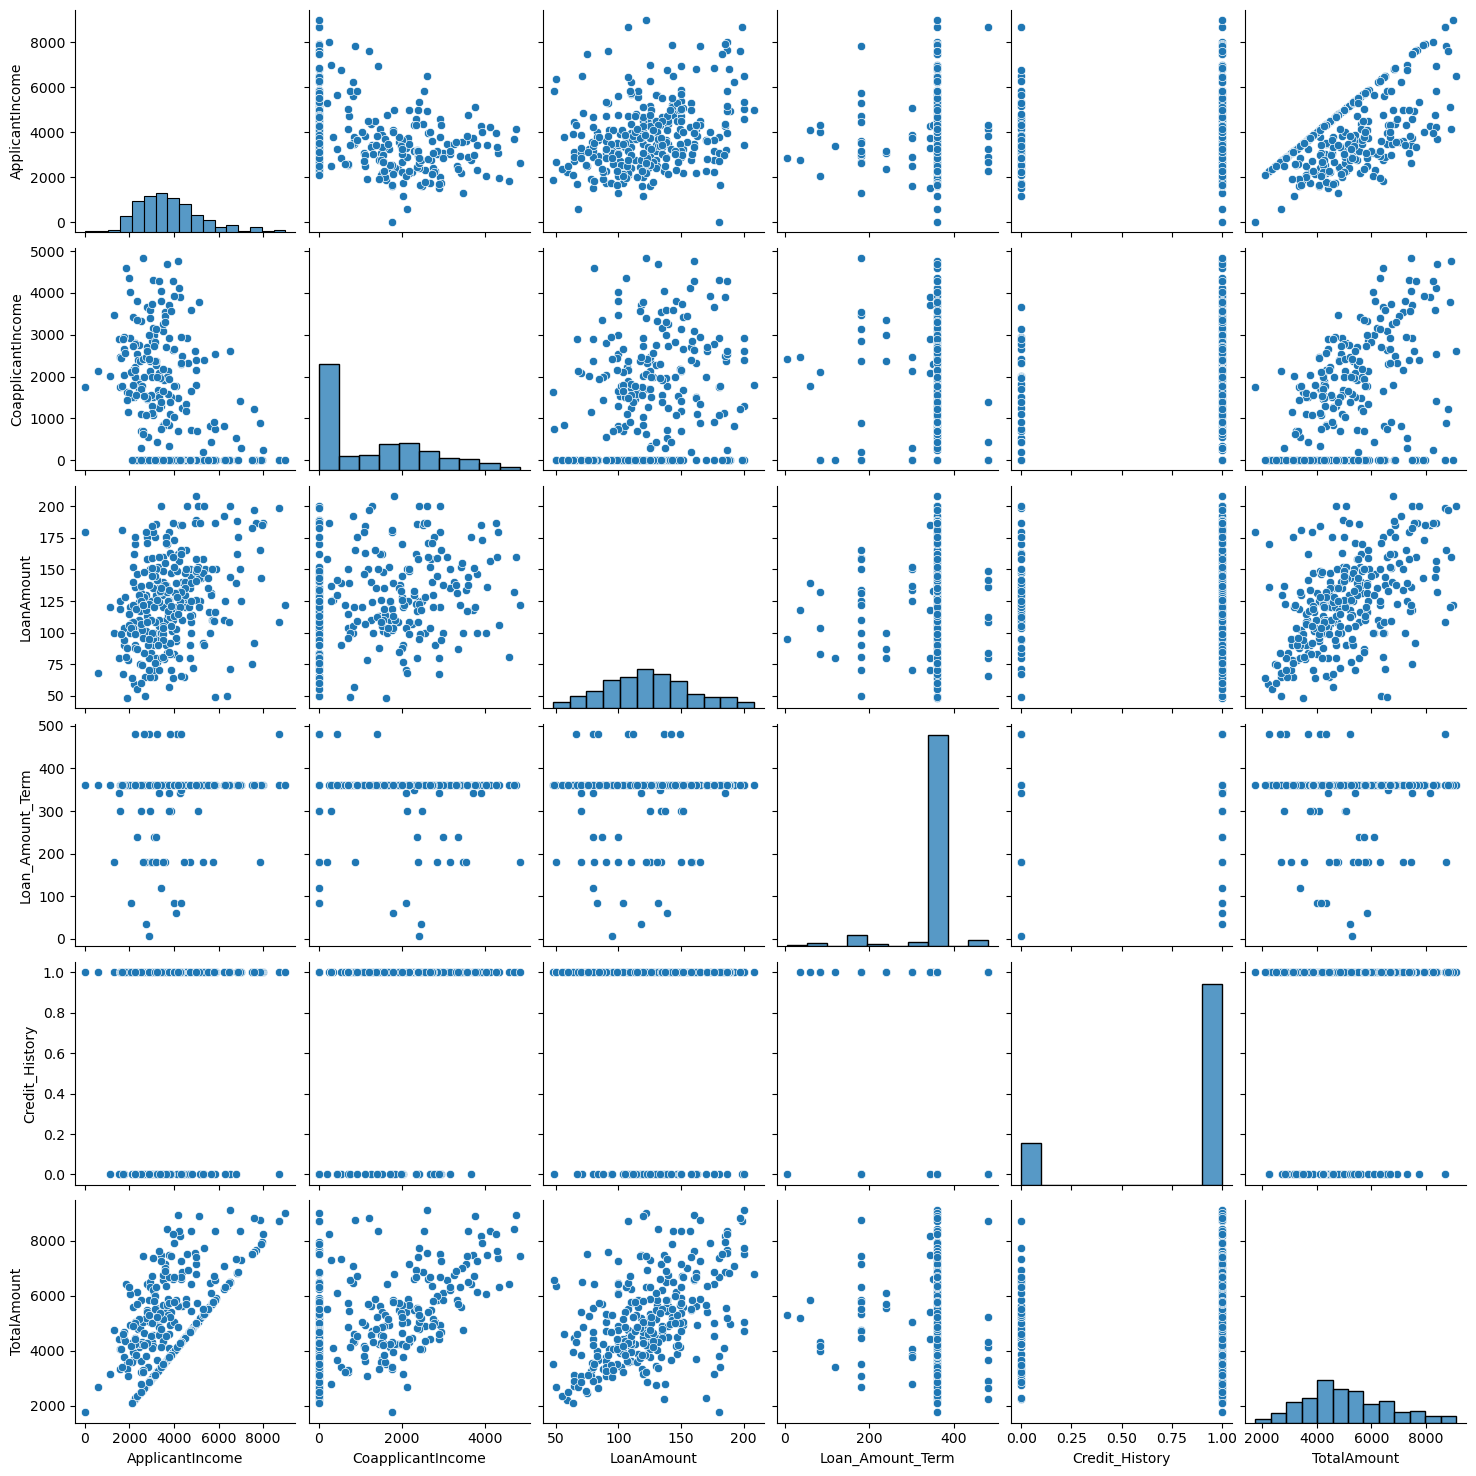

In [39]:
sns.pairplot(df1)

# LinearRegression

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
x_train=np.array(df['TotalAmount']).reshape(-1,1)
y_train=np.array(df['LoanAmount']).reshape(-1,1)
x_test=np.array(df1['TotalAmount']).reshape(-1,1)
y_test=np.array(df1['LoanAmount']).reshape(-1,1)
model=reg.fit(x_train,y_train)
model.coef_
model.intercept_
print(f"model accuracy for training data is {model.score(x_train,y_train)*100,2}%")
print(f"model accuracy for testing data is {model.score(x_test,y_test)*100,2}%")

model accuracy for training data is (41.30893527006262, 2)%
model accuracy for testing data is (23.707079565541044, 2)%


In [41]:
y_pred=model.predict(x_test)
y_pred

array([[131.75443985],
       [115.74498534],
       [146.86826055],
       [120.08321165],
       [ 97.55242339],
       [129.89320082],
       [ 82.85843105],
       [106.01896184],
       [118.87970371],
       [ 94.96348189],
       [103.49999172],
       [117.0044704 ],
       [131.0127431 ],
       [156.65026116],
       [109.3496001 ],
       [118.45987535],
       [100.79909599],
       [106.41080163],
       [104.39562554],
       [130.25705206],
       [116.15081941],
       [126.2127056 ],
       [ 86.38498922],
       [150.64671572],
       [120.99283975],
       [128.54975009],
       [111.61667321],
       [ 95.78914431],
       [122.50422182],
       [133.33579331],
       [130.15909211],
       [141.92828026],
       [102.70231785],
       [104.52157405],
       [179.05510091],
       [103.01019198],
       [165.9004792 ],
       [130.60690902],
       [111.2948048 ],
       [167.15996425],
       [109.44756005],
       [112.34437568],
       [143.74753646],
       [125

In [42]:
from sklearn import metrics
from sklearn.metrics import f1_score
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)



Mean Absolute Error: 23.36498420029934
Mean Square Error: 923.0969286461876
Root Mean Square Error: 30.382510242673952


In [43]:


# Assuming your DataFrame is named 'df' and the target column is 'target'
# Step 1: Calculate y_mean
y_mean = df1['LoanAmount'].mean()

# Step 2: Calculate squared differences between y_true and y_mean
squared_diff = (df1['LoanAmount'] - y_mean) ** 2

# Step 3: Sum up the squared differences to get SST
SST = squared_diff.sum()
SST
R=(1-meanSqErr/SST)**0.5
print(R)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


0.9987526056567079
Mean Absolute Error: 23.36498420029934
Mean Square Error: 923.0969286461876
Root Mean Square Error: 30.382510242673952


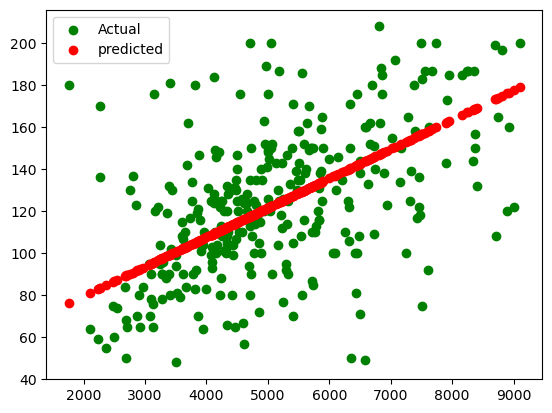

In [44]:
plt.scatter(x_test, y_test, c = "g", label = "Actual")
plt.scatter(x_test, y_pred, c = "r", label = "predicted")
plt.legend()
plt.show()

In [225]:
df1['Loan_Status']=df['Loan_Status']
df1.isna().sum()
df1['Loan_Status']=df1['Loan_Status'].ffill()
df1.isna().sum()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Loan_Status']
df1['Loan_Status']=le.fit_transform(df1['Loan_Status'])
df1['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    0
366    0
Name: Loan_Status, Length: 328, dtype: int64

# Multiple Linear Regression

In [229]:
x1_train=df[['ApplicantIncome','CoapplicantIncome','TotalAmount','Loan_Status']]
y1_train=df['LoanAmount']
x1_test=df1[['ApplicantIncome','CoapplicantIncome','TotalAmount','Loan_Status']]
y1_test=df1['LoanAmount']
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()
model1=reg.fit(x1_train,y1_train)
model1


LinearRegression()

In [232]:
y_pred1=model.predict(x1_test)
y_pred1

array([127.51276025, 122.58913859, 146.81720361, 125.08252343,
        96.63446435, 136.69205102,  83.35583886, 109.02227457,
       128.30691202,  94.31900414, 106.78146752, 107.83789452,
       114.14319238, 126.76089868, 159.28751   , 113.08959635,
       126.50769433, 109.49502238,  81.52652368, 109.47137125,
       107.57244547, 130.12692651, 120.92034586, 130.07196435,
        91.3586088 , 152.07296427, 127.88061198, 133.13443383,
       118.99151285,  94.98852929, 127.93765649, 128.94125756,
       132.32715234, 144.14306315, 101.25116357, 109.30054101,
       178.42157372, 101.53259667, 170.73761376, 131.1796914 ,
       114.99206933, 198.58138712, 160.37756738, 112.8034707 ,
       112.65036401, 153.06744059, 127.92886027, 126.93743571,
        89.95679101, 110.89099511, 161.65603312, 148.27872094,
       114.90216454, 112.87457665, 148.42938622, 122.8764921 ,
       110.28130778, 116.72762736, 153.51992472, 119.47085245,
        98.71115502, 151.97497949,  96.32458886, 111.57

In [256]:
from sklearn import metrics
meanAbErr1 = metrics.mean_absolute_error(y1_test, y_pred1)
meanSqErr1 = metrics.mean_squared_error(y1_test, y_pred1)
rootMeanSqErr1 = np.sqrt(metrics.mean_squared_error(y1_test, y_pred1))
print('Mean Absolute Error:', meanAbErr1)
print('Mean Square Error:', meanSqErr1)
print('Root Mean Square Error:', rootMeanSqErr1)


Mean Absolute Error: 26.286341571724307
Mean Square Error: 1168.037562988296
Root Mean Square Error: 34.17656452875707


In [275]:

y_mean1 = df1['LoanAmount'].mean()
squared_diff1 = (df1['LoanAmount'] - y_mean1) ** 2

# Step 3: Sum up the squared differences to get SST
SST1 = squared_diff.sum()
SST1
R1=(1-meanSqErr1/SST1)**0.5
print(R1)
print('Mean Absolute Error:', meanAbErr1)
print('Mean Square Error:', meanSqErr1)
print('Root Mean Square Error:', rootMeanSqErr1)

0.998869235494701
Mean Absolute Error: 26.286341571724307
Mean Square Error: 1168.037562988296
Root Mean Square Error: 34.17656452875707


# Polynomial Regression

In [249]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
x2_train=np.array(df['TotalAmount']).reshape(-1,1)
X=poly.fit_transform(x2_train)
print(X)
y2_train=np.array(df['LoanAmount']).reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg3=LinearRegression()
model3=reg3.fit(X,y2_train)
model3
x2_test=np.array(df1['TotalAmount']).reshape(-1,1)
Y=poly.fit_transform(x2_test)
y2_test=np.array(df1['LoanAmount']).reshape(-1,1)

[[1.0000000e+00 5.8490000e+03 3.4210801e+07]
 [1.0000000e+00 6.0910000e+03 3.7100281e+07]
 [1.0000000e+00 3.0000000e+03 9.0000000e+06]
 ...
 [1.0000000e+00 8.3120000e+03 6.9089344e+07]
 [1.0000000e+00 7.5830000e+03 5.7501889e+07]
 [1.0000000e+00 4.5830000e+03 2.1003889e+07]]


In [250]:
y2_pred=model3.predict(Y)
y2_pred

array([[139.19819496],
       [117.6547749 ],
       [157.48187548],
       [123.7137353 ],
       [ 90.45595674],
       [136.80859872],
       [ 66.37707259],
       [103.47352698],
       [122.04934012],
       [ 86.35036612],
       [ 99.66596614],
       [109.38880801],
       [119.4307641 ],
       [138.24957658],
       [168.25181809],
       [108.42287362],
       [121.46576049],
       [ 95.52183807],
       [ 62.95183384],
       [104.06083259],
       [101.02611576],
       [137.27811745],
       [118.22855122],
       [131.99422258],
       [ 72.32801484],
       [161.74101583],
       [124.96331301],
       [135.06497308],
       [111.73632911],
       [ 87.66607541],
       [127.02355283],
       [141.20467604],
       [137.15182233],
       [151.72533328],
       [ 98.44868344],
       [101.21682483],
       [189.76975209],
       [ 98.91917048],
       [177.66733323],
       [137.72848719],
       [111.26863484],
       [201.29529634],
       [178.89151072],
       [108

In [262]:
from sklearn import metrics
meanAbErr2 = metrics.mean_absolute_error(y2_test, y2_pred)
meanSqErr2 = metrics.mean_squared_error(y2_test, y2_pred)
rootMeanSqErr2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))
print('Mean Absolute Error:', meanAbErr2)
print('Mean Square Error:', meanSqErr2)
print('Root Mean Square Error:', rootMeanSqErr2)


Mean Absolute Error: 25.700937182955524
Mean Square Error: 1238.3611129993487
Root Mean Square Error: 35.19035539745725


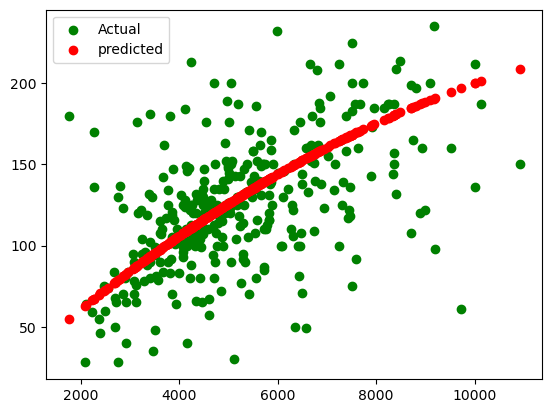

In [263]:
plt.scatter(Y[:,1], y2_test, c = "g", label = "Actual")
plt.scatter(Y[:,1], y2_pred, c = "r", label = "predicted")
plt.legend()
plt.show()

In [261]:
y_mean2 = df1['LoanAmount'].mean()
squared_diff2 = (df1['LoanAmount'] - y_mean2) ** 2

SST2 = squared_diff.sum()
SST2
R2=(1-meanSqErr2/SST2)**0.5
print(R2)

0.9988011151708049


# Multiple Polynomial Regression

In [265]:
poly2=PolynomialFeatures()
x3_train=df[['ApplicantIncome','TotalAmount','TotalAmount','Loan_Status']]
y3_train=np.array(df['LoanAmount']).reshape(-1,1)
X1=poly2.fit_transform(x3_train)
x3_test=df1[['ApplicantIncome','TotalAmount','TotalAmount','Loan_Status']]
y3_test=np.array(df1['LoanAmount']).reshape(-1,1)
Y1=poly2.fit_transform(x3_test)

In [266]:
reg4=LinearRegression()
model4=reg4.fit(X1,y3_train)
model4

LinearRegression()

In [268]:
y3_pred=model4.predict(Y1)
y3_pred

array([[138.64884147],
       [119.59478437],
       [156.26422028],
       [118.18413064],
       [ 90.53215059],
       [131.1013036 ],
       [ 66.47131351],
       [110.83423151],
       [121.11201866],
       [ 86.4406751 ],
       [ 95.02103887],
       [109.33171657],
       [119.25130005],
       [137.72244825],
       [168.01575839],
       [114.41231042],
       [113.15167544],
       [ 96.42814877],
       [ 63.03687461],
       [111.39385549],
       [108.50035982],
       [135.32839626],
       [122.3391736 ],
       [127.74582484],
       [ 80.93856952],
       [164.79198045],
       [126.48763688],
       [130.53187071],
       [113.40324023],
       [ 87.75239081],
       [121.2954278 ],
       [140.60665498],
       [134.14697186],
       [155.13544469],
       [ 98.48289306],
       [ 94.97928608],
       [192.3827839 ],
       [ 98.95028385],
       [179.32897686],
       [135.49252638],
       [106.25929036],
       [206.65413916],
       [177.23441175],
       [103

In [269]:
from sklearn import metrics
meanAbErr3 = metrics.mean_absolute_error(y3_test, y3_pred)
meanSqErr3 = metrics.mean_squared_error(y3_test, y3_pred)
rootMeanSqErr3 = np.sqrt(metrics.mean_squared_error(y3_test, y3_pred))
print('Mean Absolute Error:', meanAbErr3)
print('Mean Square Error:', meanSqErr3)
print('Root Mean Square Error:', rootMeanSqErr3)


Mean Absolute Error: 25.703920393195798
Mean Square Error: 1255.1342960624534
Root Mean Square Error: 35.427874563152294


In [271]:

y_mean3 = df1['LoanAmount'].mean()
squared_diff3 = (df1['LoanAmount'] - y_mean3) ** 2

# Step 3: Sum up the squared differences to get SST
SST3 = squared_diff.sum()
SST3
R3=(1-meanSqErr3/SST3)**0.5
print(R3)
print('Mean Absolute Error:', meanAbErr3)
print('Mean Square Error:', meanSqErr3)
print('Root Mean Square Error:', rootMeanSqErr3)

0.9987848668027873
Mean Absolute Error: 25.703920393195798
Mean Square Error: 1255.1342960624534
Root Mean Square Error: 35.427874563152294
